<a href="https://colab.research.google.com/github/JulianaFanni/datascience/blob/main/JulianaFanni_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Juliana Fanni - Análise de Dados e Boas Práticas

MVP de Análise de Dados e Boas Práticas

Profs. Tatiana Escovedo e Hugo Villamizar

Aluna: Juliana Cardozo Pereira Fanni

## 1. Definição do Problema

A instituição é uma organização que tem como objetivo projetos de pesquisas científicas na área de saúde. Uma vez comprovadas a segurança e a eficácia do produto na fase pré-clínica, iniciam-se as pesquisas em seres humanos. As pessoas se voluntariam para participar de ensaios clínicos para testar as intervenções médicas, incluindo drogas, células e outros produtos, chamados de pesquisados. No entanto , após uma análise dos pesquisados nas pesquisas identificou um alto número de **Falha de Triagem**  no status dos pesquisados, ou seja, um voluntário que não se enquadrou adequadamente ao projeto de pesquisa causando grande impacto financeiro e no prazo dos projetos.


Diante do acima exposto, o objetivo deste trabalho é prever se um voluntário à um projeto de pesquisa se enquadra ao perfil de estudo do projeto de pesquisa. Para este MVP, focarei nos critérios de enquadramento dos projetos de pesquisa de Ancogenética, pois cada projeto possui critérios de perfil de pesquisado especifico.

O dataset usado neste projeto será o próprio da instituição e o conjunto de dados foi extraído para uma planilha excel a partir de um sistema interno e de acesso restrito, no entanto todos os dados dos pesquisados e o nome das pesquisas foram alterados tendo assim os direitos garantidos pela lgpd e dos próprios projetos de pesquisa da empresa.




---

**Dicionário de dados:**

- **Participante**: Indentificação do participante no sistema.
-	**Idade**: Idade do participante.
- **Sexobiologico**: Sexo de nascimento do participante.

  Sendo:
    1	-Masculino;
    2- Feminino
- **Estadocivil**: Estado civil do participante.

  Sendo:
    1- Solteiro(a);
    2- Casado(a);
    3- Divorciado(a)/Separado(a);
    4- Viúvo(a)

- **fumante**: Indicativo se o participante é fumante.

 Sendo:
    1	-Sim;
    2- Não

- **fumante_anos**: Caso o participante seja um fumante indica o tempo.
- **bebida_alcool**: Indica se o participante ingere alguma bebida alcoólica.

 Sendo:
    1	-Sim;
    2- Não

- **atividade_fisica**: Indica se o participante faz alguma atividade física.

 Sendo:
    1	-Sim;
    2- Não

- **diagnotico_cancer**: Indica se o participante já teve diagnostico de Câncer

 Sendo:
    1	-Sim;
    2- Não

- **historico_cancer_familia**: Indica se o participante tem histórico de Câncer na família

 Sendo:
    1	-Sim;
    2- Não
    
- **teste_genetico**: indica se o participante já realizou o teste genético

 Sendo:
    1	-Sim;
    2- Não




---



**Importando as bibliotecas necessárias**

In [28]:
# Carrega bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [2]:
from PIL import Image

# Caminho para a imagem
caminho_imagem = 'https://github.com/JulianaFanni/datascience/blob/b5439449353d1e74e50dc11b2dc5c43a6a91e1fe/grafico1.jpeg'

# Carregando a imagem
#imagem = Image.open(caminho_imagem)

# Mostrando a imagem
#imagem.show()


In [29]:
# ignornar os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Neste processo irei disponibilizar informações relevantes e usarei o pacote Pandas que irá carregar o arquivo "Participantes.csv", para a transformação de dados brutos em informações valiosas e prontas para análise e exploração. A carga eficiente desses dados é essencial para o início do processo de análise.

In [30]:
# Carrega arquivo csv usando Pandas usando uma URL e hospedado em meu Github

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/JulianaFanni/datascience/main/Participantes.csv"

# Informa o cabeçalho das colunas
colunas = ['Participante',	'Idade' , 'Sexobiologico',
           'Estadocivil',	'fumante',	'fumante_anos', 'bebida_alcool' ,
           'atividade_fisica', 'diagnotico_cancer',	'historico_cancer_familia' ,	'teste_genetico', 'output']


# Lê o arquivo CSV utilizando as colunas informadas delimitadas por ","
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

dataset.head()

,Participante,Idade,Sexobiologico,Estadocivil,fumante,fumante_anos,bebida_alcool,atividade_fisica,diagnotico_cancer,historico_cancer_familia,teste_genetico,output
0,4,63,1,2,3,0,1.0,2,2,1,1,1
1,5,37,1,2,2,21,1.0,2,1,2,1,1
2,11,41,1,2,1,0,2.0,2,2,1,1,1
3,12,56,1,2,1,0,2.0,2,1,2,1,1
4,14,57,2,2,1,0,2.0,2,1,2,1,1


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

A primeira análise será examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões do dataset, ou seja quantidade de linhas e colunas
print(dataset.shape)

(3218, 16)


Meu dataset mostrou ter:
- 3218 linhas
- 16 colunas (campos)

In [ ]:
# Verificar os tipos dos atributos do banco importado
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CoParticipante            3217 non-null   float64
 1   IDParticipante            2982 non-null   object 
 2   NMParticipante            3217 non-null   object 
 3   Idade                     3217 non-null   float64
 4   Sexo_Biologico            3217 non-null   float64
 5   Estado_Civil              3217 non-null   float64
 6   nível_escolaridade        3217 non-null   float64
 7   fumante                   3217 non-null   float64
 8   fumante_anos              730 non-null    float64
 9   fumante_parado            3218 non-null   int64  
 10  bebida_alcool             3218 non-null   int64  
 11  atividade_fisica          3218 non-null   int64  
 12  diagnotico_cancer         3218 non-null   int64  
 13  historico_cancer_familia  3218 non-null   int64  
 14  teste_ge

Agora irei analisar os primeiros registros, como o dataset tem mais de 3mil registros irei analisar os 50 primeiros e as 50 últimas.

In [ ]:
# comando que lê as 50 primeiras linhas do dataset
dataset.head(50)

,CoParticipante,IDParticipante,NMParticipante,Idade,Sexo_Biologico,Estado_Civil,nível_escolaridade,fumante,fumante_anos,fumante_parado,bebida_alcool,atividade_fisica,diagnotico_cancer,historico_cancer_familia,teste_genetico,Cancer_positivo
0,4.0,BR21-01508,EPO,63.0,1.0,2.0,3.0,0.0,1.0,2,2,1,1,1,NaN,NaN
1,5.0,BR21-00034,EMA,37.0,1.0,2.0,2.0,21.0,1.0,2,1,2,1,1,NaN,NaN
2,11.0,12502,MS,41.0,1.0,2.0,1.0,0.0,2.0,2,2,1,1,1,NaN,NaN
3,12.0,12716,AM,56.0,1.0,2.0,1.0,0.0,2.0,2,1,2,1,1,NaN,NaN
4,14.0,13331,VMS,57.0,2.0,2.0,1.0,0.0,2.0,2,1,2,1,1,NaN,NaN
5,16.0,105003,JTJ,57.0,2.0,2.0,1.0,0.0,2.0,2,1,2,0,1,NaN,NaN
6,17.0,105095,OXM,56.0,2.0,2.0,1.0,0.0,2.0,2,2,2,0,1,NaN,NaN
7,18.0,105215,IGM,44.0,2.0,2.0,1.0,0.0,2.0,2,2,2,1,1,NaN,NaN
8,19.0,105216,ZMR,52.0,1.0,2.0,2.0,29.0,1.0,2,1,2,1,1,NaN,NaN
9,20.0,105636,MDT,57.0,1.0,2.0,2.0,32.0,1.0,2,1,2,1,1,NaN,NaN


In [ ]:
# comando que lê as 50 últimas linhas do dataset
dataset.tail(50)

,CoParticipante,IDParticipante,NMParticipante,Idade,Sexo_Biologico,Estado_Civil,nível_escolaridade,fumante,fumante_anos,fumante_parado,bebida_alcool,atividade_fisica,diagnotico_cancer,historico_cancer_familia,teste_genetico,Cancer_positivo
3168,3283.0,10013,AAV,40.0,1.0,2.0,1.0,0.0,NaN,2,1,2,0,0,NaN,NaN
3169,3284.0,10014,CSSS,40.0,1.0,2.0,1.0,0.0,NaN,2,1,2,1,0,NaN,NaN
3170,3285.0,10015,LMA,39.0,1.0,2.0,1.0,0.0,NaN,2,1,2,1,0,NaN,NaN
3171,3286.0,10016,APSP,31.0,1.0,2.0,1.0,0.0,NaN,2,1,2,1,0,NaN,NaN
3172,3287.0,10017,JPR,45.0,1.0,2.0,2.0,25.0,NaN,2,1,2,1,0,NaN,NaN
3173,3288.0,10018,MLM,41.0,1.0,2.0,1.0,0.0,NaN,2,1,2,1,0,NaN,NaN
3174,3289.0,10019,MSM,43.0,1.0,2.0,1.0,0.0,NaN,2,1,2,1,0,NaN,NaN
3175,3290.0,10020,JCO,29.0,1.0,2.0,1.0,0.0,NaN,2,1,2,1,0,NaN,NaN
3176,3291.0,10021,SLS,40.0,1.0,2.0,1.0,0.0,NaN,2,1,2,1,0,NaN,NaN
3177,3292.0,10022,LCRO,39.0,1.0,2.0,2.0,21.0,NaN,2,1,2,0,0,NaN,NaN


Verificando os tipos dos atributos do banco importado. Se os atributos possuem o tipo correto.

In [ ]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

CoParticipante              float64
IDParticipante               object
NMParticipante               object
Idade                       float64
Sexo_Biologico              float64
Estado_Civil                float64
nível_escolaridade          float64
fumante                     float64
fumante_anos                float64
fumante_parado                int64
bebida_alcool                 int64
atividade_fisica              int64
diagnotico_cancer             int64
historico_cancer_familia      int64
teste_genetico              float64
Cancer_positivo             float64
dtype: object

In [ ]:
# describe fornece algumas estatísticas descritivas
dataset.describe

<bound method NDFrame.describe of       CoParticipante IDParticipante NMParticipante  Idade  Sexo_Biologico  \
0                4.0     BR21-01508            EPO   63.0             1.0   
1                5.0     BR21-00034            EMA   37.0             1.0   
2               11.0          12502             MS   41.0             1.0   
3               12.0          12716             AM   56.0             1.0   
4               14.0          13331            VMS   57.0             2.0   
...              ...            ...            ...    ...             ...   
3213          3328.0         1840-5            MLA   51.0             1.0   
3214          3329.0            NaN            CFC   23.0             1.0   
3215          3330.0            NaN            RJA   47.0             1.0   
3216          3331.0            NaN           MLJA   39.0             1.0   
3217             NaN            NaN            NaN    NaN             NaN   

      Estado_Civil  nível_escolaridade  f

In [ ]:
# algumas estatísticas descritivas em outra visão, transposta
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CoParticipante,3217.0,1677.278520,955.969042,4.0,853.0,1674.0,2505.0,3331.0
Idade,3217.0,52.751943,13.971364,19.0,42.0,52.0,62.0,105.0
Sexo_Biologico,3217.0,1.056574,0.231064,1.0,1.0,1.0,1.0,2.0
Estado_Civil,3217.0,1.890270,0.469951,1.0,2.0,2.0,2.0,4.0
nível_escolaridade,3217.0,1.324837,0.574528,1.0,1.0,1.0,2.0,3.0
fumante,3217.0,6.065900,12.154990,0.0,0.0,0.0,0.0,58.0
fumante_anos,730.0,1.698630,0.459168,1.0,1.0,2.0,2.0,2.0
fumante_parado,3218.0,2.000932,0.088150,1.0,2.0,2.0,2.0,3.0
bebida_alcool,3218.0,1.311995,0.463380,1.0,1.0,1.0,2.0,2.0
atividade_fisica,3218.0,1.696395,0.459885,1.0,1.0,2.0,2.0,2.0


In [ ]:
# Verificando se existe valores ausentes
dataset.isna().sum()/len(dataset)*100

CoParticipante                0.031075
IDParticipante                7.333748
NMParticipante                0.031075
Idade                         0.031075
Sexo_Biologico                0.031075
Estado_Civil                  0.031075
nível_escolaridade            0.031075
fumante                       0.031075
fumante_anos                 77.315103
fumante_parado                0.000000
bebida_alcool                 0.000000
atividade_fisica              0.000000
diagnotico_cancer             0.000000
historico_cancer_familia      0.000000
teste_genetico              100.000000
Cancer_positivo             100.000000
dtype: float64

Verificarei se o dataset tem o indicador de câncer positivo está balanceado, caso exista será tratado  o desbalanceamento. O output cancer positivo 0 (não ocorrência de câncer) e 1 (ocorrência de câncer) . Caso exista, um tratamento será realizado posteriormente.

In [ ]:
# distribuição das classes
print(dataset.groupby('Cancer_positivo').size())

Series([], dtype: int64)


### 3.2. Visualizações Unimodais

Nesta etapa, vou criar um histograma para cada atributo com o banco de dados sem nenhum tratamento ou ajuste, que irá permitir conhecer a distribuição individual de cada fator cancerigeno.

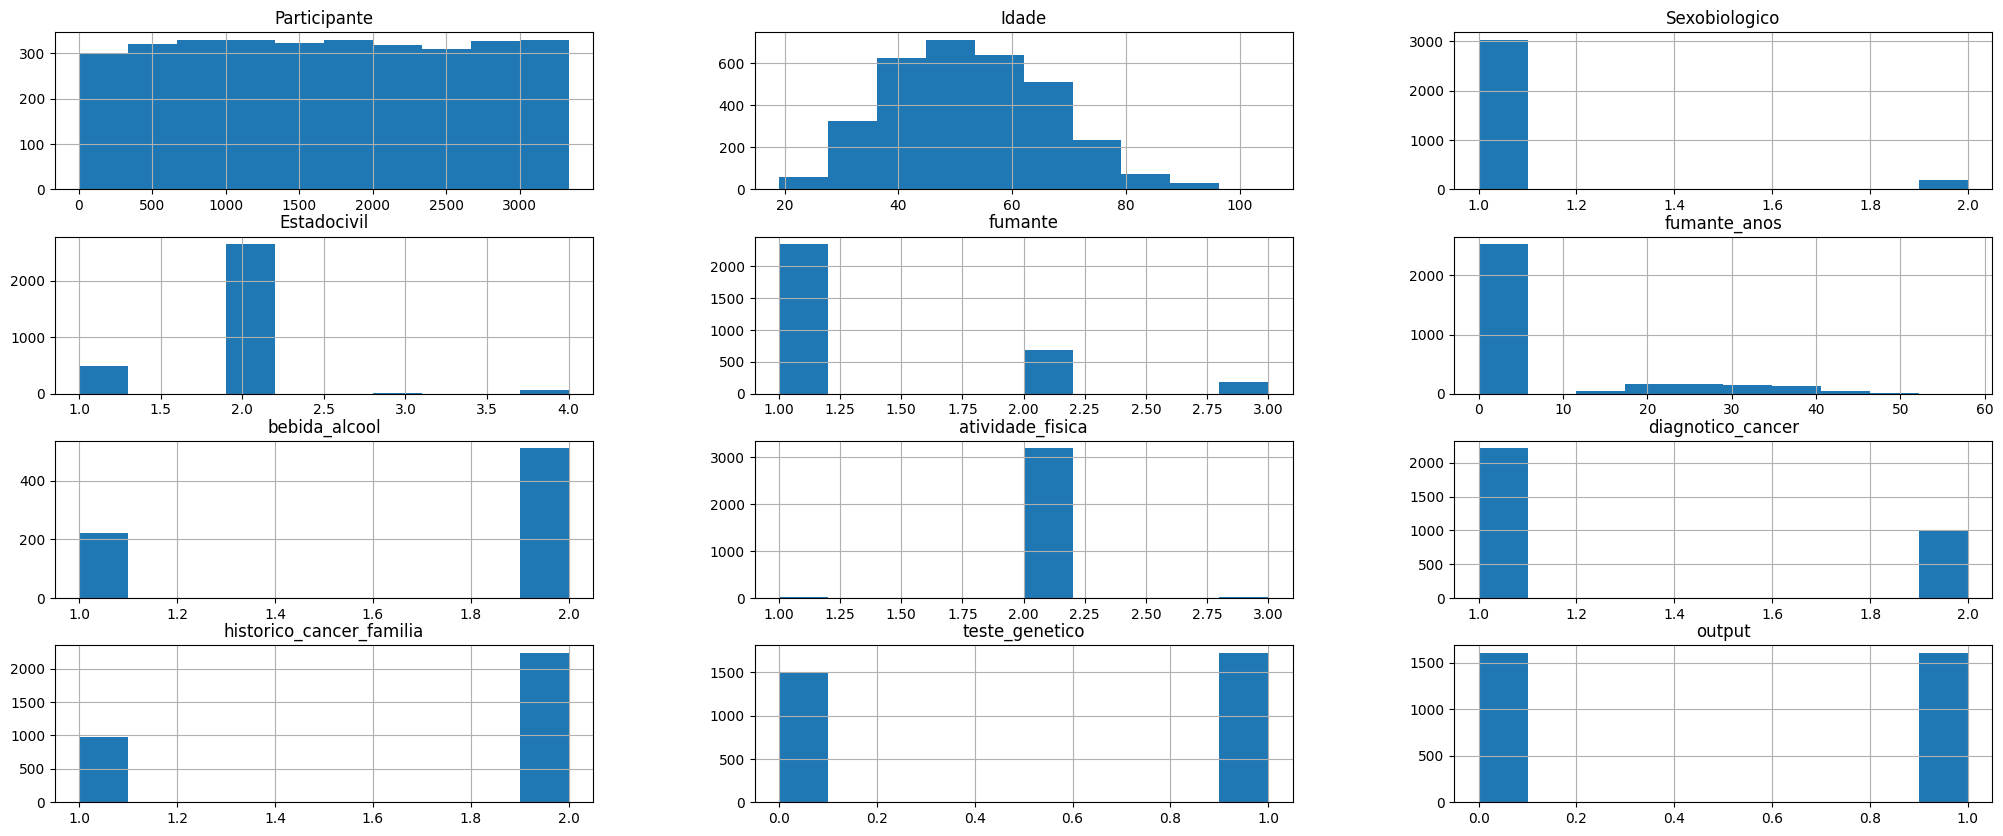

In [6]:
# Histograma
dataset.hist(figsize = (25,10))
plt.show()

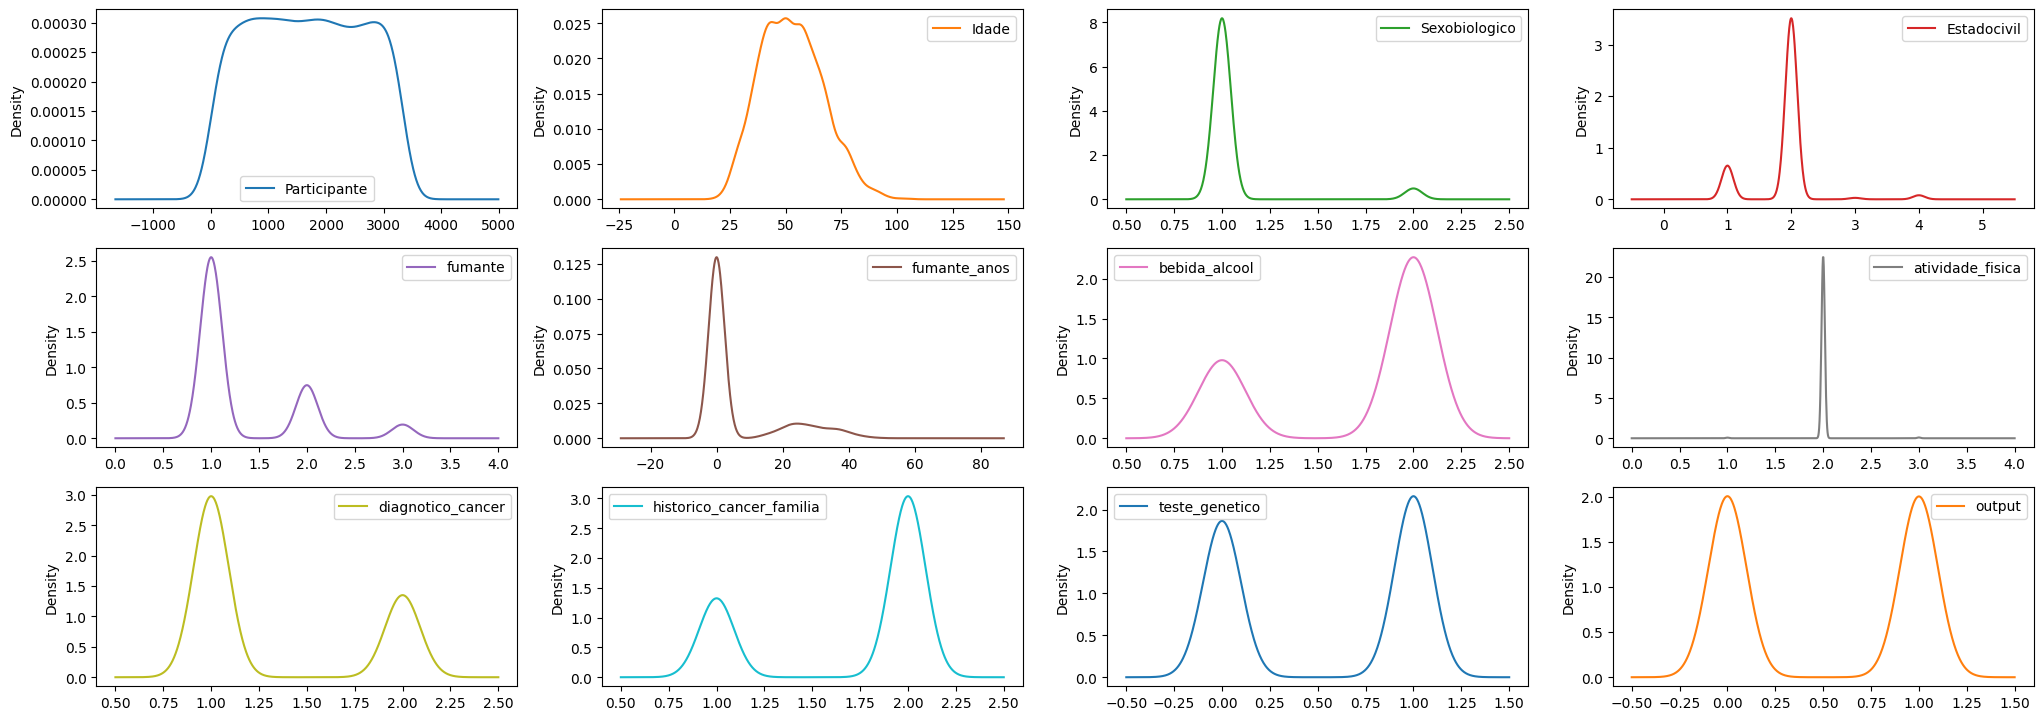

In [15]:
# Gráfico de densidade
dataset.plot(kind = 'density', subplots = True, layout = (5,4), sharex = False, figsize = (25,15))
plt.show()


Agora irei analisar com boxplots. O boxplot me permitirá avaliar a dispersão dos dados, indicando a variabilidade e a presença de valores extremos.

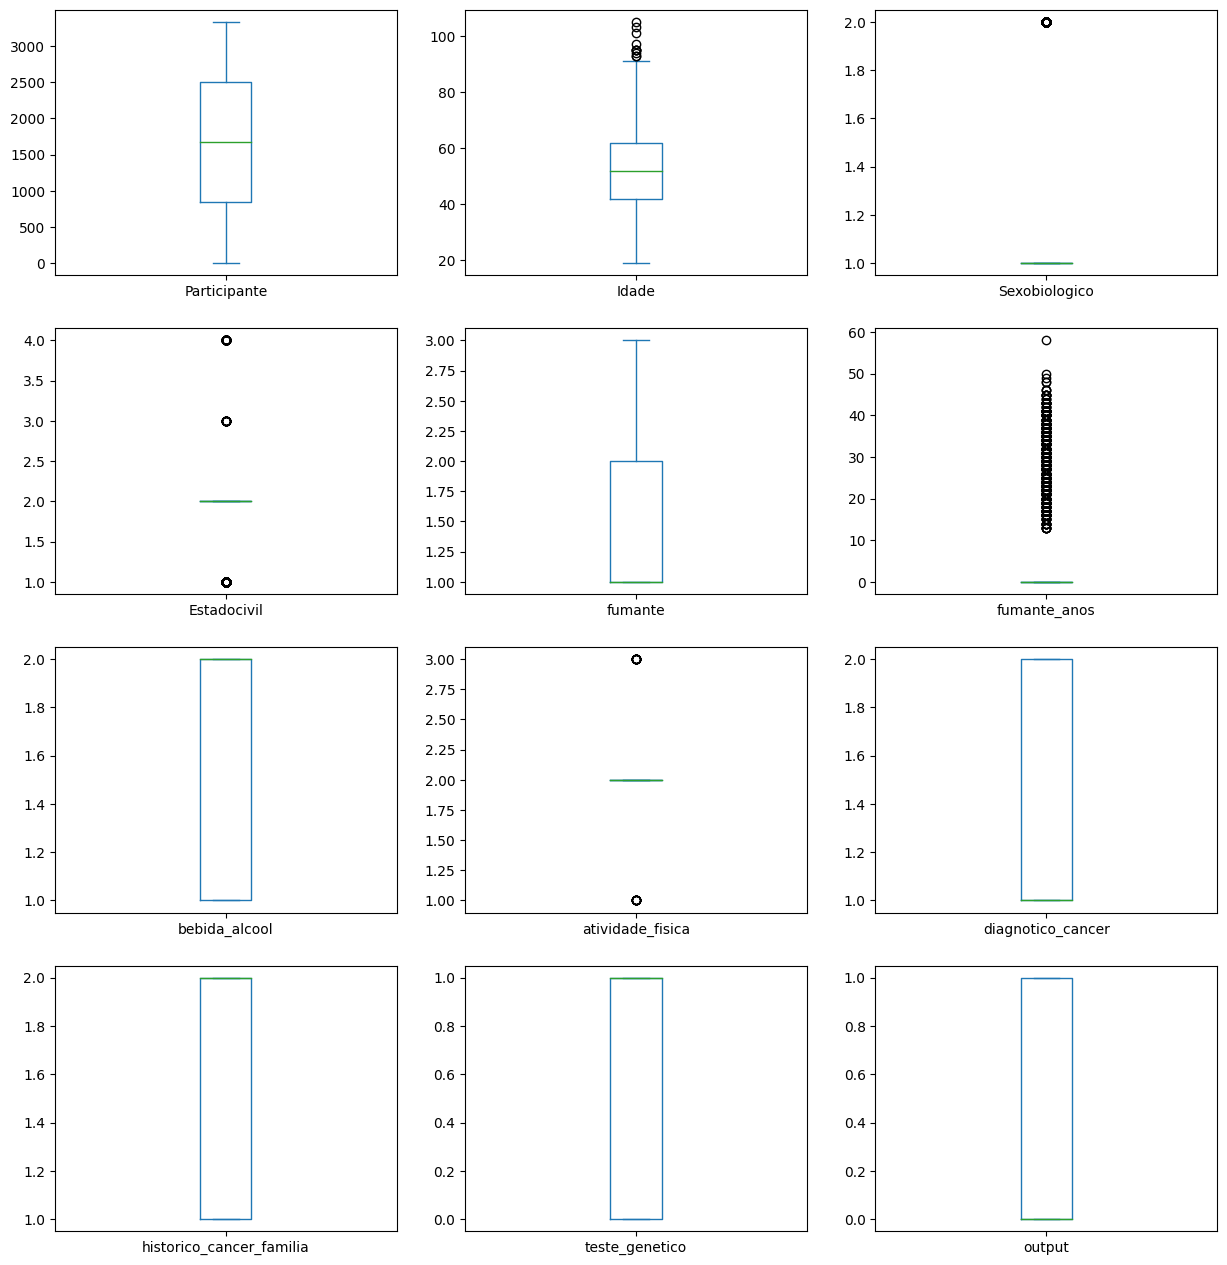

In [21]:
dataset.plot(kind = 'box', subplots = True, layout = (5,3), sharex = False, sharey = False, figsize = (15,20))
plt.show()

Ao utilizar boxplots, pude rapidamente ter uma visão geral da distribuição de dados e tomar decisões informadas sobre o tratamento de outliers, comparação de grupos e compreensão da variabilidade dos dados.

### 3.3. Visualizações Multimodais

Farei uma analise multimodal devido aos dados dispersos e assim identificar a correlação nos atributos.

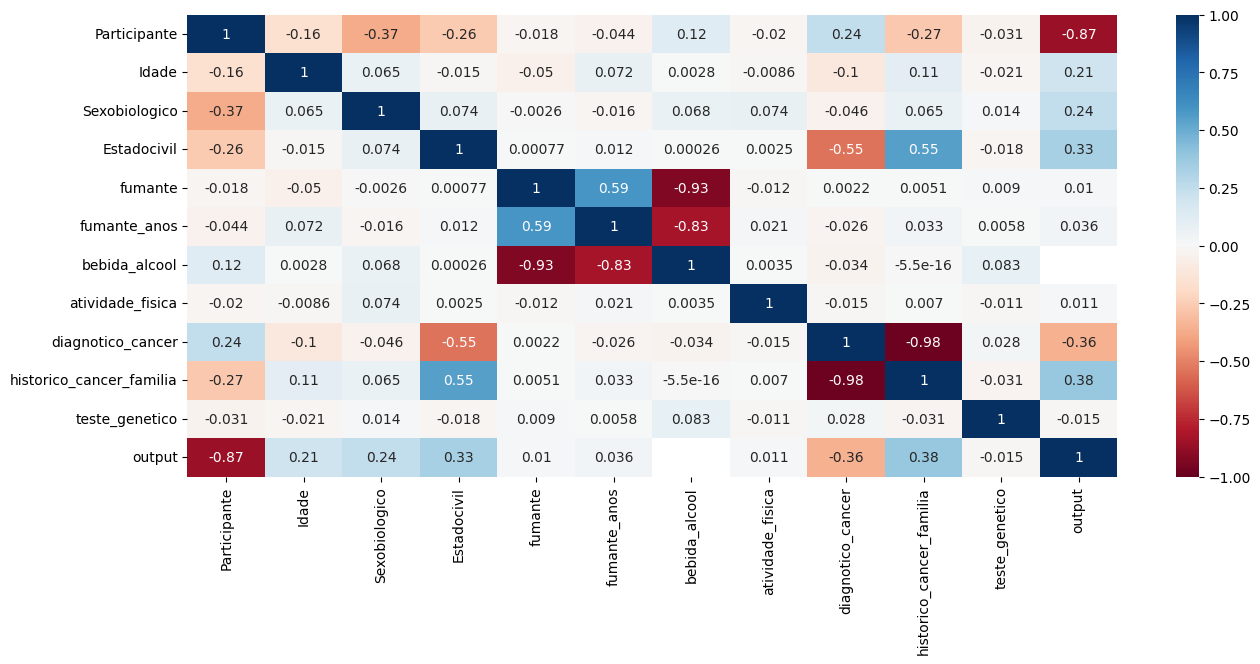

In [13]:
# Matriz de Correlação com Seaborn

plt.figure(figsize = (15,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

 **Correlação negativa**

> fumante_anos x bebida_anos : -0.83

> historico_cancer_familiar x diagnostico_cancer : -0.98

 **Correlação Positiva**

> fumante_anos x fumante : 0.059






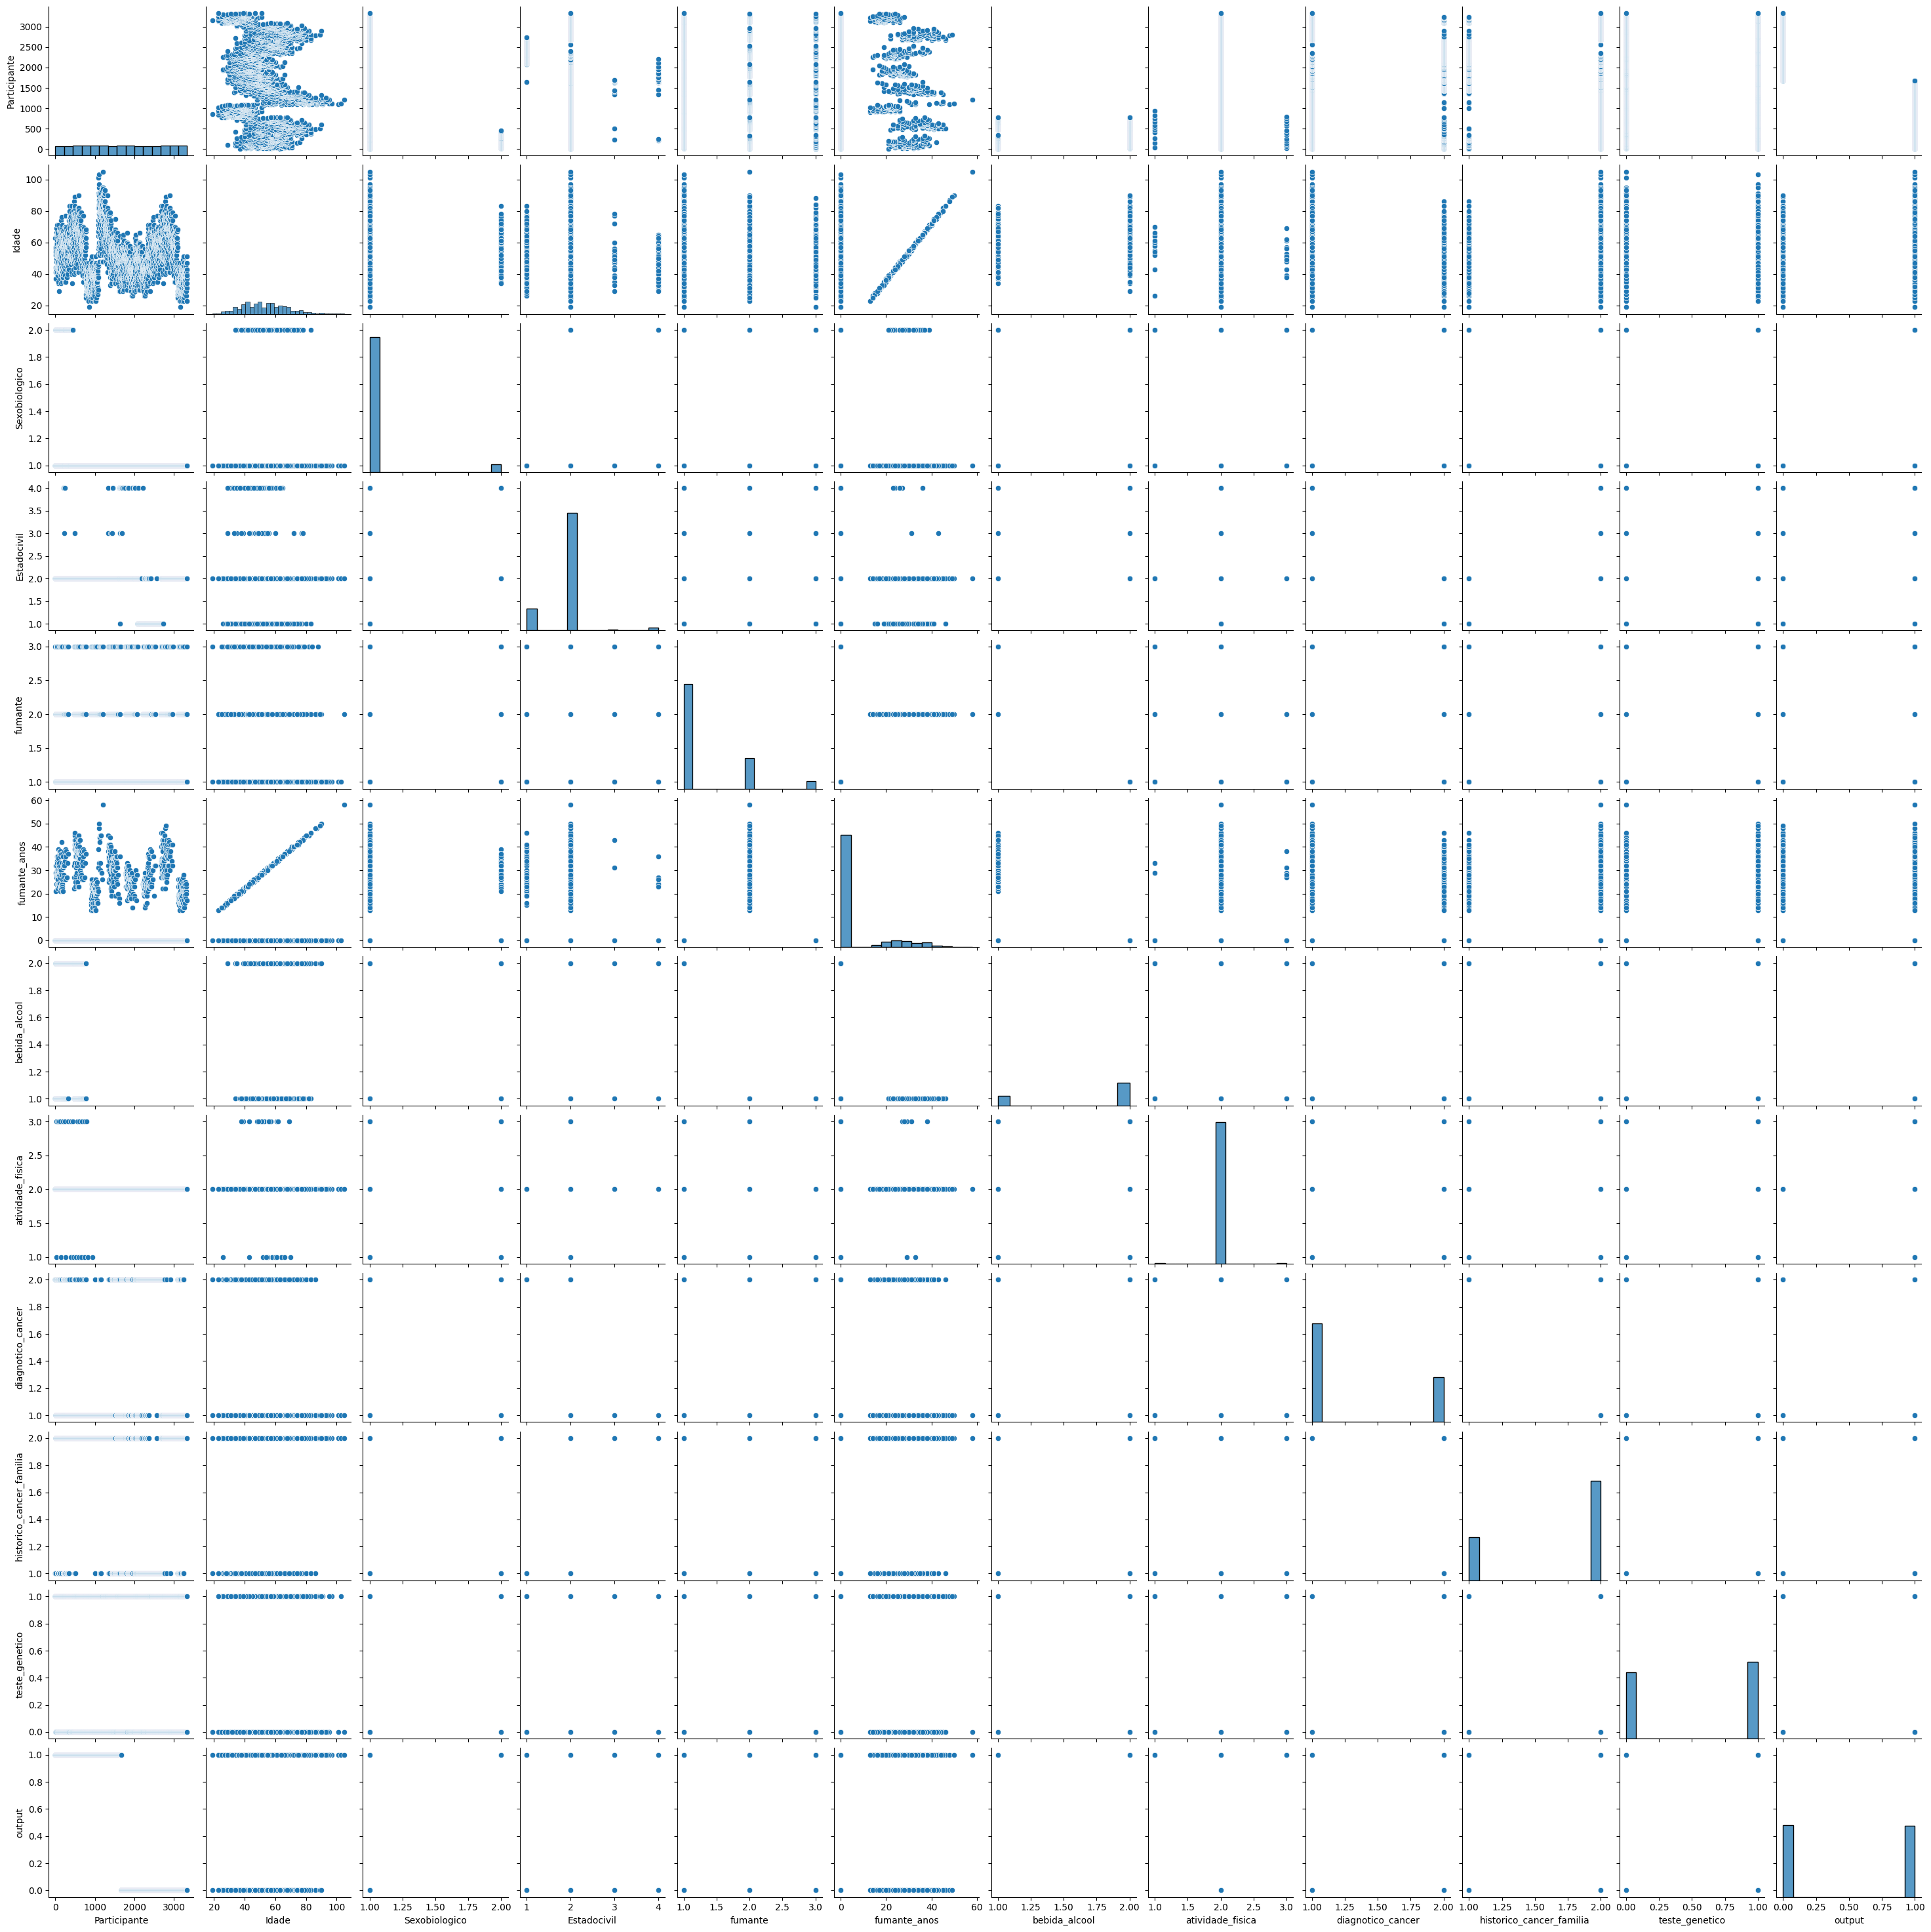

In [33]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(dataset)

## 4. Pré-Processamento de dados

### 4.1. Tratamento de Missings e Limpeza

  #### 4.1.1 Tratamento de Missings

Dados ausentes podem surgir por diversos motivos, como erros de coleta, falhas nos instrumentos de medição ou simplesmente porque certas informações não foram fornecidas para facilitar análises subsequentes.

Verificarei aqui quais variávies a quantidade encontram-se valores faltantes ou missing.

In [31]:
# verificando se existe nulls, valores faltantes no dataset
dataset.isnull().sum()

Participante                   0
Idade                          0
Sexobiologico                  0
Estadocivil                    0
fumante                        0
fumante_anos                   0
bebida_alcool               2487
atividade_fisica               0
diagnotico_cancer              0
historico_cancer_familia       0
teste_genetico                 0
output                         0
dtype: int64

2488 valores faltantes ou missing no atributo "bebida_alcool", que identifica se o participante consome bebida alcoolica.

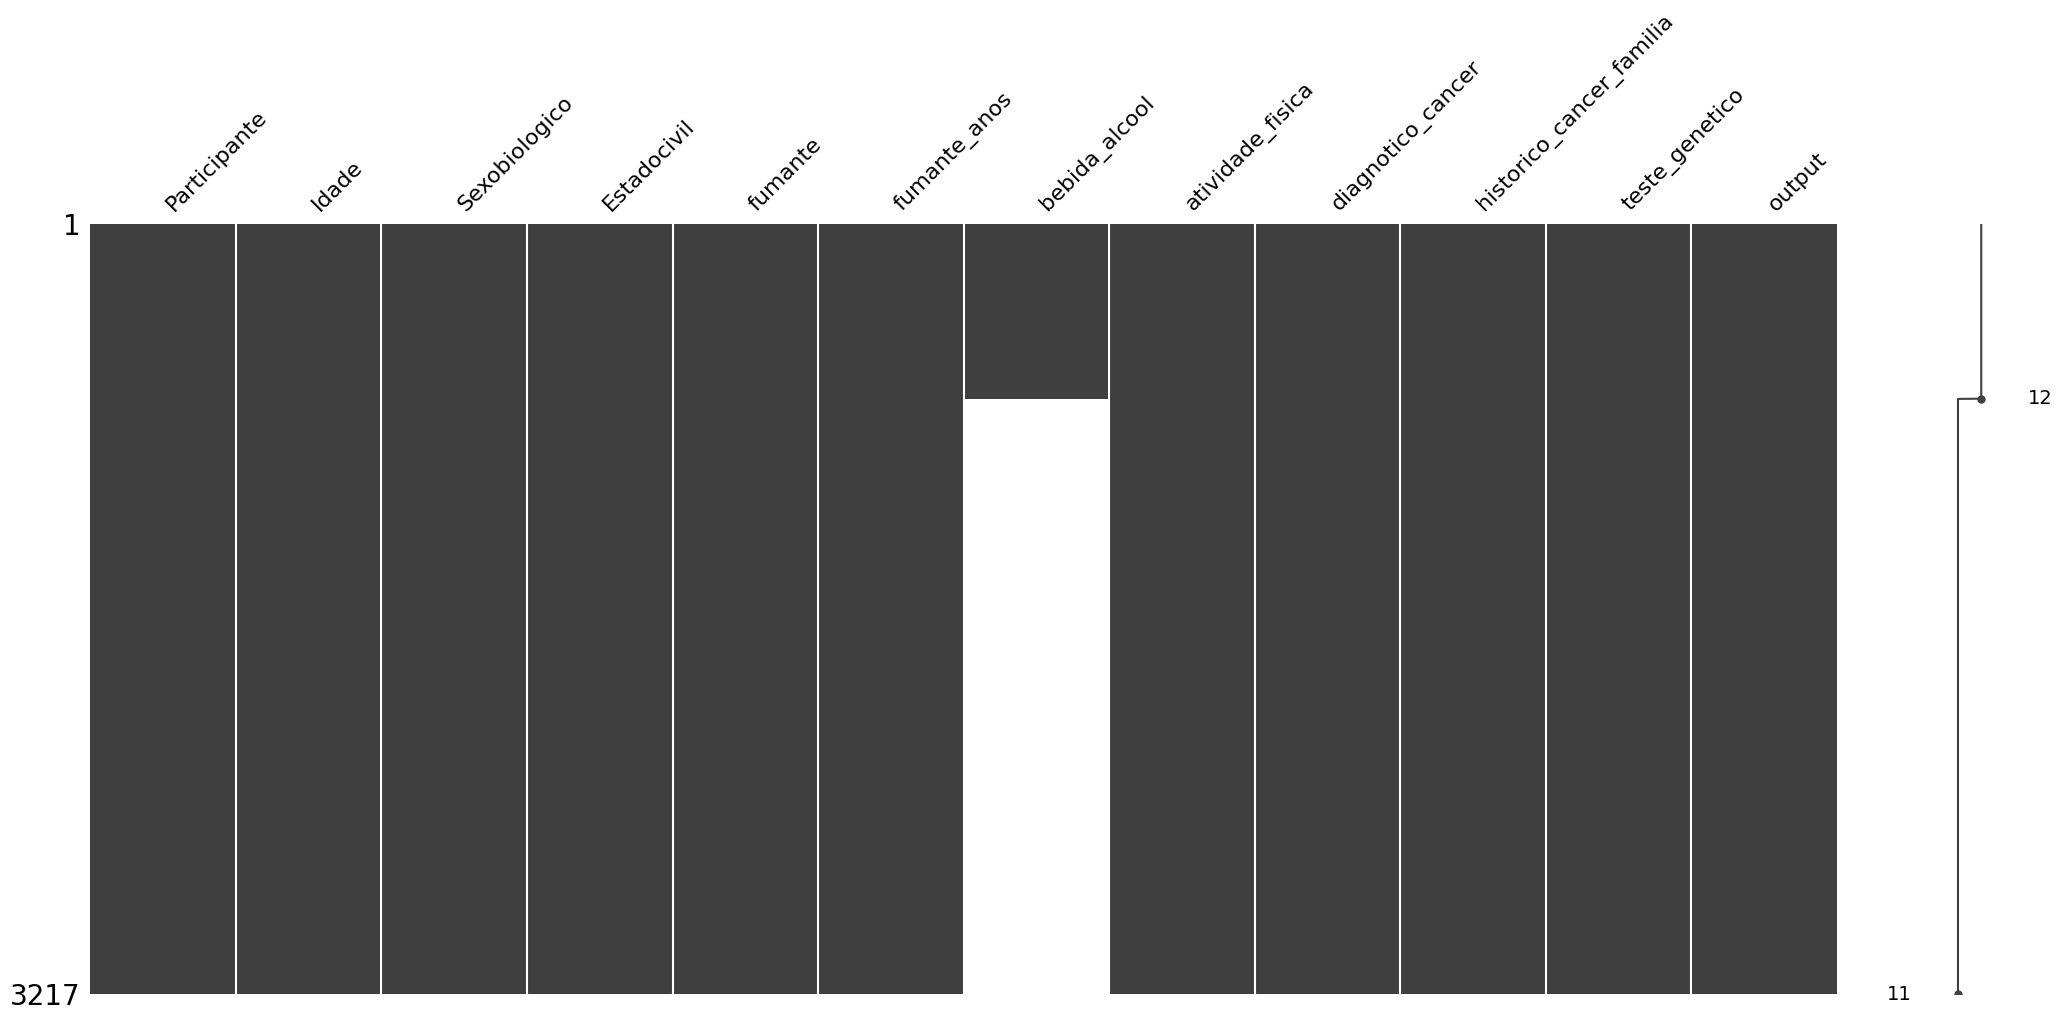

In [33]:
# recuperando os nomes das colunas
col = list(dataset.columns)

# salvando um novo dataset para tratamento de missings, o novo dataset irá conter todas as colunas do dataset original
dadoSemMissings = dataset[col[:]]

# exibindo visualização matricial do dataset antes da manipulação
ms.matrix(dadoSemMissings);


No gráfico acima analisei os valores faltantes e assim tratar os dados por alguma imputação. Sendo assim, das possibilidades de tratamento, optei pela imputação do valor zero pelas características do meu dataset se tratar de  variáveis quantitativas.



<Axes: >

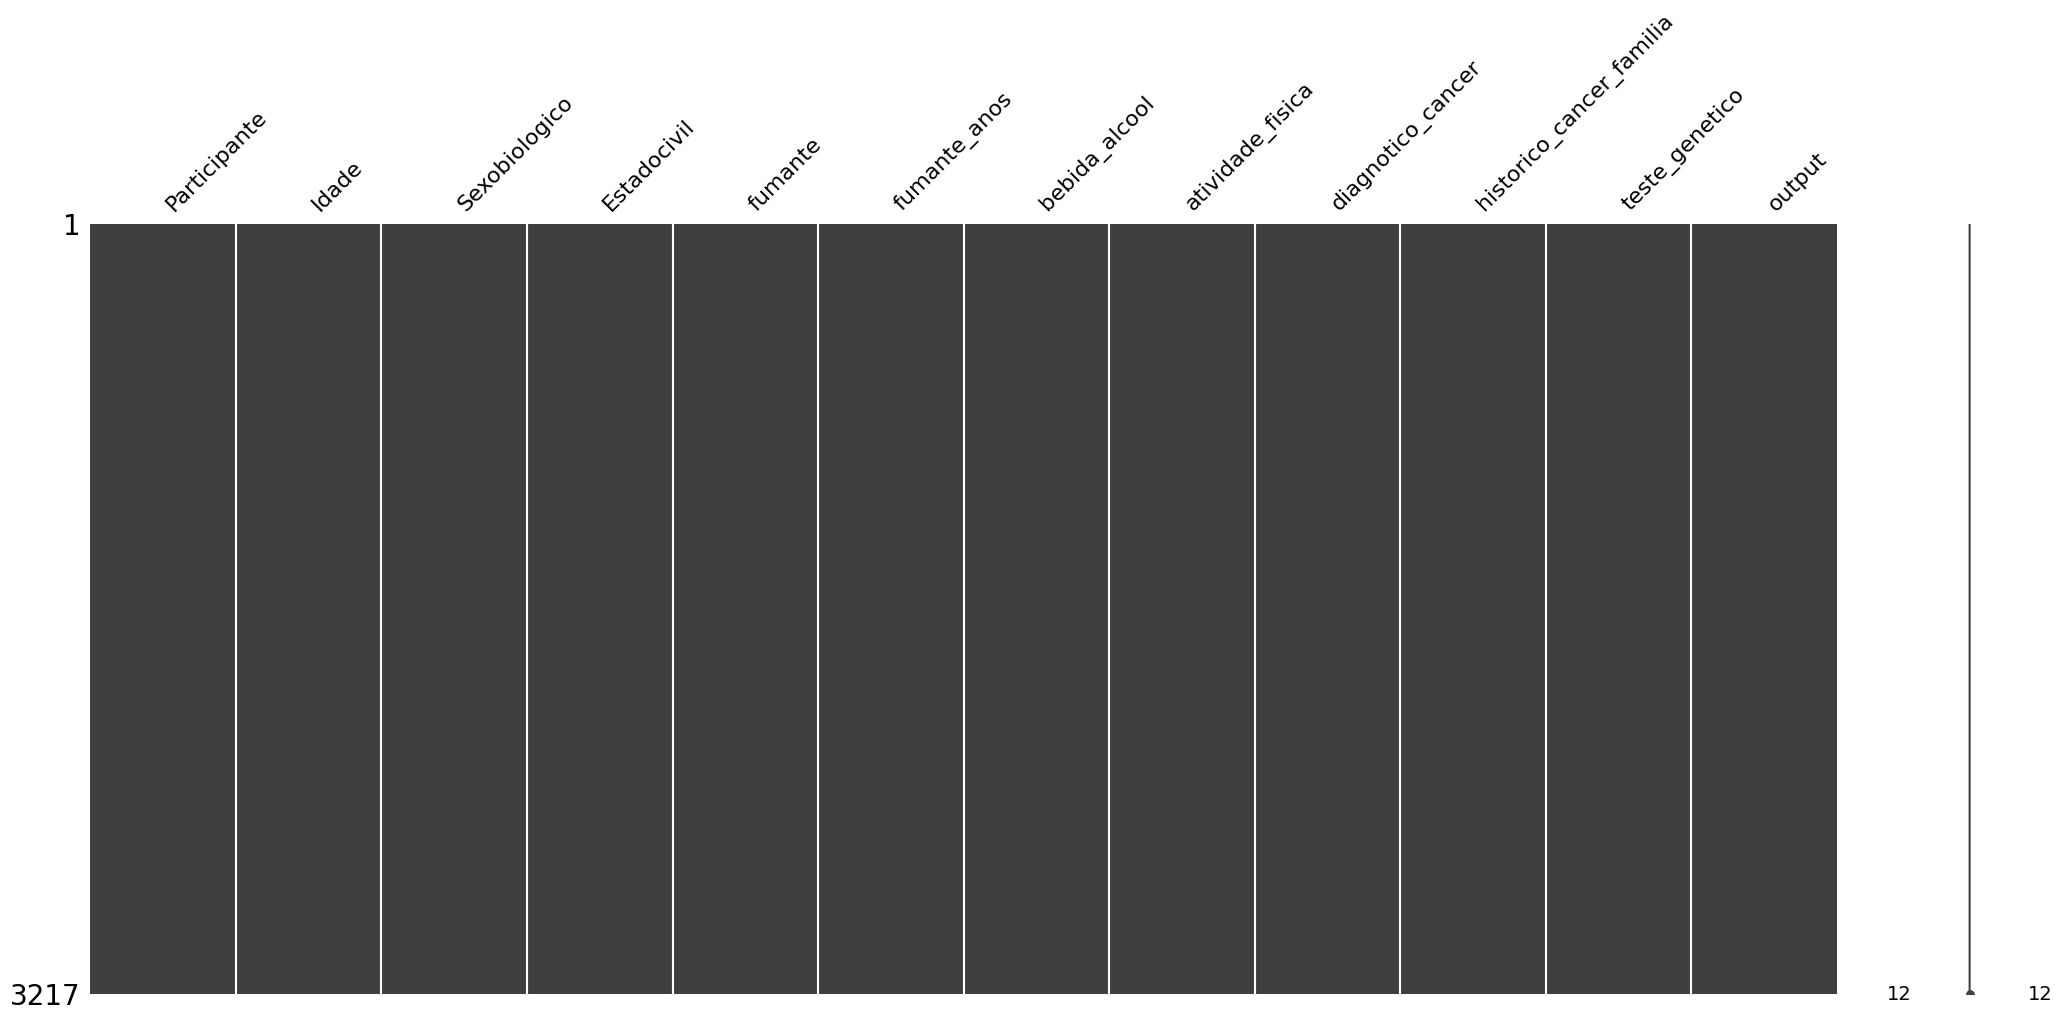

In [34]:
dadoSemMissings['bebida_alcool'].fillna(0, inplace=True)

# exibindo visualização matricial após a imputação
ms.matrix(dadoSemMissings)

In [35]:
# verificando valores faltantes no dataset após a imputação
dadoSemMissings.isna().sum()

Participante                0
Idade                       0
Sexobiologico               0
Estadocivil                 0
fumante                     0
fumante_anos                0
bebida_alcool               0
atividade_fisica            0
diagnotico_cancer           0
historico_cancer_familia    0
teste_genetico              0
output                      0
dtype: int64

Acima verifiquei que os valores faltantes ou missing no atributo "bebida_alcool" foi tratado.

In [36]:
#  describe fornece algumas estatísticas descritivas
dadoSemMissings.describe()

,Participante,Idade,Sexobiologico,Estadocivil,fumante,fumante_anos,bebida_alcool,atividade_fisica,diagnotico_cancer,historico_cancer_familia,teste_genetico,output
count,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.00000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000
mean,1677.278520,52.751943,1.056574,1.890270,1.324837,6.06590,0.385452,2.000933,1.312092,1.696301,0.536525,0.499845
std,955.969042,13.971364,0.231064,0.469951,0.574528,12.15499,0.744390,0.088163,0.463419,0.459926,0.498742,0.500078
min,4.000000,19.000000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,853.000000,42.000000,1.000000,2.000000,1.000000,0.00000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,1674.000000,52.000000,1.000000,2.000000,1.000000,0.00000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000
75%,2505.000000,62.000000,1.000000,2.000000,2.000000,0.00000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,3331.000000,105.000000,2.000000,4.000000,3.000000,58.00000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000


In [37]:
# comando que lê as 50 primeiras linhas do dataset
dadoSemMissings.head(50)

,Participante,Idade,Sexobiologico,Estadocivil,fumante,fumante_anos,bebida_alcool,atividade_fisica,diagnotico_cancer,historico_cancer_familia,teste_genetico,output
0,4,63,1,2,3,0,1.0,2,2,1,1,1
1,5,37,1,2,2,21,1.0,2,1,2,1,1
2,11,41,1,2,1,0,2.0,2,2,1,1,1
3,12,56,1,2,1,0,2.0,2,1,2,1,1
4,14,57,2,2,1,0,2.0,2,1,2,1,1
5,16,57,2,2,1,0,2.0,2,1,2,0,1
6,17,56,2,2,1,0,2.0,2,2,2,0,1
7,18,44,2,2,1,0,2.0,2,2,2,1,1
8,19,52,1,2,2,29,1.0,2,1,2,1,1
9,20,57,1,2,2,32,1.0,2,1,2,1,1


  #### 4.1.2 Normalização

In [38]:
# transformação do dataframe para um vetor.
dadoSemMissings_normal = np.asarray(dadoSemMissings)

dadoSemMissings_normal

array([[4.000e+00, 6.300e+01, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.000e+00, 3.700e+01, 1.000e+00, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [1.100e+01, 4.100e+01, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [3.329e+03, 2.300e+01, 1.000e+00, ..., 2.000e+00, 1.000e+00,
        0.000e+00],
       [3.330e+03, 4.700e+01, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        0.000e+00],
       [3.331e+03, 3.900e+01, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        0.000e+00]])

In [45]:
# Criando um objeto de normalização
scaler = MinMaxScaler()

# Ajustando o modelo e transformando os dados de uma vez , calcular a média e o desvio padrão e transformar os dados simultaneamente.
scaled = scaler.fit_transform(dadoSemMissings_normal)
print(scaled)


[[0.00000000e+00 5.11627907e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [3.00571085e-04 2.09302326e-01 0.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.10399760e-03 2.55813953e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 ...
 [9.99398858e-01 4.65116279e-02 0.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.99699429e-01 3.25581395e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.32558140e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [52]:
 # Padronizando os dados tendo uma distribuição proxima  uma distribuição normal
dado_padronizado = StandardScaler().fit_transform(scaled)

print(dado_padronizado)

[[-1.75062013  0.73361843 -0.24488171 ... -1.51417729  0.92943372
   1.0003109 ]
 [-1.74957391 -1.12762013 -0.24488171 ...  0.66042465  0.92943372
   1.0003109 ]
 [-1.74329658 -0.84127573 -0.24488171 ... -1.51417729  0.92943372
   1.0003109 ]
 ...
 [ 1.72806669 -2.12982551 -0.24488171 ...  0.66042465  0.92943372
  -0.9996892 ]
 [ 1.72911291 -0.41175914 -0.24488171 ...  0.66042465 -1.07592395
  -0.9996892 ]
 [ 1.73015913 -0.98444793 -0.24488171 ...  0.66042465 -1.07592395
  -0.9996892 ]]


In [53]:

# Informa o cabeçalho das colunas para a Transformação do array em um DataFrame novamente
colunas_normal = ['Participante',	'Idade' , 'Sexobiologico',
           'Estadocivil',	'fumante',	'fumante_anos', 'bebida_alcool' ,
           'atividade_fisica', 'diagnotico_cancer',	'historico_cancer_familia' ,	'teste_genetico', 'output']

# Transformação do array em um DataFrame novamente já com os dados normalizados e padronizados
dado_transformados = pd.DataFrame(dado_padronizado, columns = colunas_normal)

dado_transformados

,Participante,Idade,Sexobiologico,Estadocivil,fumante,fumante_anos,bebida_alcool,atividade_fisica,diagnotico_cancer,historico_cancer_familia,teste_genetico,output
0,-1.750620,0.733618,-0.244882,0.233528,2.916173,-0.499124,0.825700,-0.010579,1.484649,-1.514177,0.929434,1.000311
1,-1.749574,-1.127620,-0.244882,0.233528,1.175344,1.228830,0.825700,-0.010579,-0.673560,0.660425,0.929434,1.000311
2,-1.743297,-0.841276,-0.244882,0.233528,-0.565485,-0.499124,2.169291,-0.010579,1.484649,-1.514177,0.929434,1.000311
3,-1.742250,0.232516,-0.244882,0.233528,-0.565485,-0.499124,2.169291,-0.010579,-0.673560,0.660425,0.929434,1.000311
4,-1.740158,0.304102,4.083604,0.233528,-0.565485,-0.499124,2.169291,-0.010579,-0.673560,0.660425,0.929434,1.000311
...,...,...,...,...,...,...,...,...,...,...,...,...
3212,1.725974,-0.912862,-0.244882,0.233528,-0.565485,-0.499124,-0.517890,-0.010579,-0.673560,0.660425,-1.075924,-0.999689
3213,1.727020,-0.125415,-0.244882,0.233528,-0.565485,-0.499124,-0.517890,-0.010579,-0.673560,0.660425,0.929434,-0.999689
3214,1.728067,-2.129826,-0.244882,0.233528,-0.565485,-0.499124,-0.517890,-0.010579,-0.673560,0.660425,0.929434,-0.999689
3215,1.729113,-0.411759,-0.244882,0.233528,-0.565485,-0.499124,-0.517890,-0.010579,-0.673560,0.660425,-1.075924,-0.999689


#### 4.1.3 Visualização de Informação após o tratamento de dados

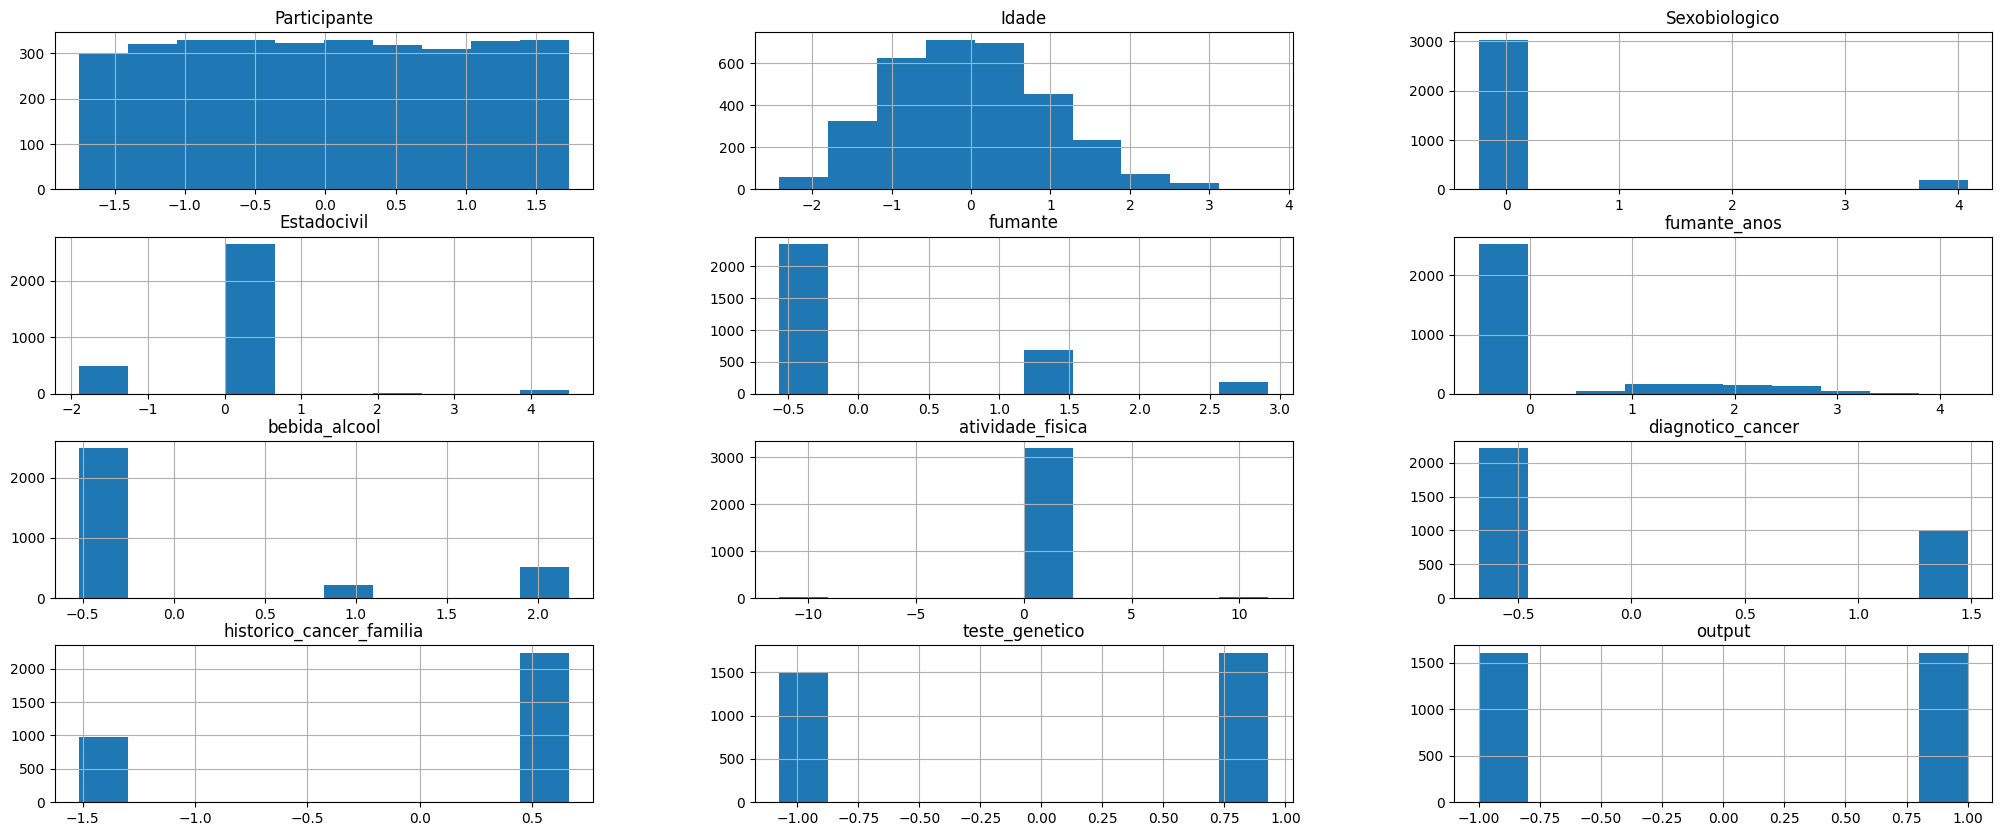

In [54]:
# Histograma dos dados transformados
dado_transformados.hist(figsize = (25,10))
plt.show()

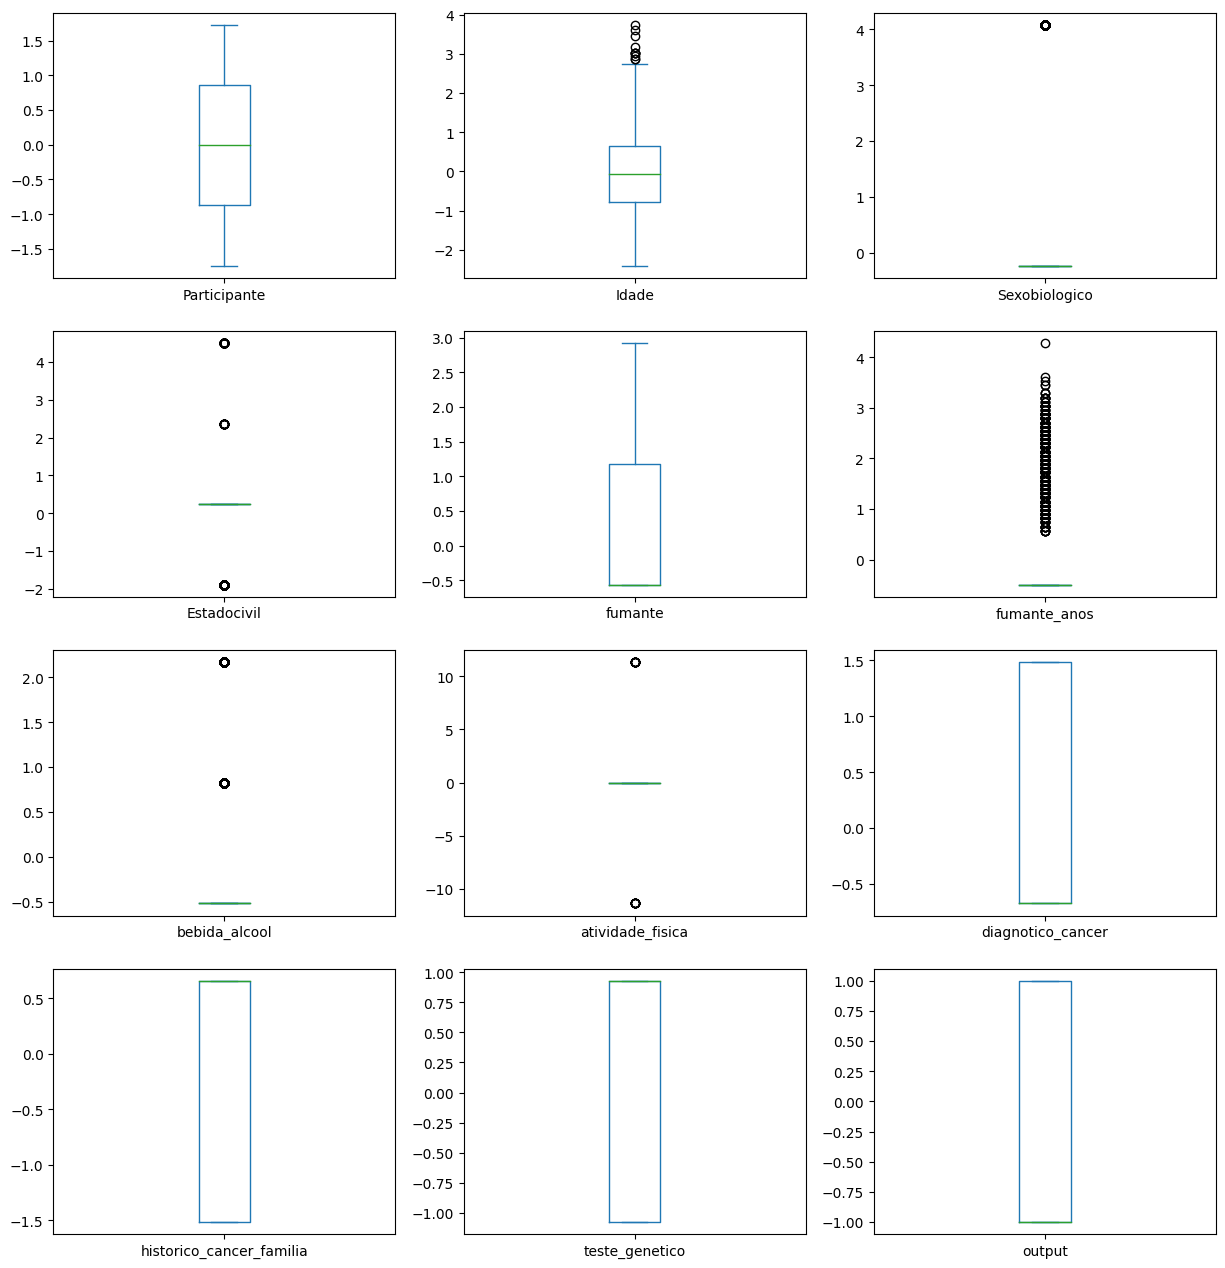

In [55]:
# Boxplot dos dados transformados
dado_transformados.plot(kind = 'box', subplots = True, layout = (5,3), sharex = False, sharey = False, figsize = (15,20))
plt.show()

### 4.2. Separação em conjunto de treino e conjunto de teste

Na separação em conjunto de treino e conjunto de teste, usarei 70% do conjunto de dados para modelagem e os 30% para teste.

In [56]:
# Verificando total de linhas e colunas do dataset

dado_transformados.shape

(3217, 12)

In [67]:
test_size = 0.20
seed = 7

array = dado_transformados.values

X = array[:,0:11]
y = array[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação


In [77]:
print ("Dados de treino X: \n\n", X_train)

Dados de treino X: 

 [[ 0.27381867 -0.76968964 -0.24488171 ...  1.48464921 -1.51417729
   0.92943372]
 [-0.01284605 -0.05382865 -0.24488171 ...  1.48464921 -1.51417729
   0.92943372]
 [ 0.63476512 -1.05603403 -0.24488171 ...  1.48464921 -1.51417729
  -1.07592395]
 ...
 [ 0.73729483  0.73361843 -0.24488171 ...  1.48464921 -1.51417729
  -1.07592395]
 [ 0.25707912 -1.48555062 -0.24488171 ...  1.48464921 -1.51417729
  -1.07592395]
 [ 0.96014003  0.94837673 -0.24488171 ...  1.48464921 -1.51417729
  -1.07592395]]


In [78]:
print ("Dados de treino Y: \n\n" , y_train)

Dados de treino Y: 

 [-0.9996892  1.0003109 -0.9996892 ... -0.9996892 -0.9996892 -0.9996892]


In [76]:
print ("Dados de teste X: \n\n", X_test)

Dados de teste X: 

 [[-0.84982333 -0.55493134 -0.24488171 ... -0.67355978  0.66042465
  -1.07592395]
 [ 0.67138287 -0.48334524 -0.24488171 ... -0.67355978  0.66042465
  -1.07592395]
 [ 1.34410336  0.30410184 -0.24488171 ... -0.67355978  0.66042465
  -1.07592395]
 ...
 [ 0.55315983 -0.91286183 -0.24488171 ...  1.48464921 -1.51417729
   0.92943372]
 [-0.94398328 -0.55493134 -0.24488171 ... -0.67355978  0.66042465
  -1.07592395]
 [ 0.0478348  -1.19920623 -0.24488171 ...  1.48464921 -1.51417729
   0.92943372]]


In [75]:
print ("Dados de teste Y: \n\n",y_test)

Dados de teste Y: 

 [ 1.0003109 -0.9996892 -0.9996892 -0.9996892 -0.9996892  1.0003109
  1.0003109  1.0003109 -0.9996892  1.0003109 -0.9996892 -0.9996892
  1.0003109  1.0003109  1.0003109 -0.9996892  1.0003109 -0.9996892
 -0.9996892 -0.9996892 -0.9996892  1.0003109  1.0003109  1.0003109
 -0.9996892 -0.9996892 -0.9996892 -0.9996892  1.0003109 -0.9996892
  1.0003109 -0.9996892  1.0003109 -0.9996892 -0.9996892 -0.9996892
  1.0003109  1.0003109 -0.9996892  1.0003109  1.0003109 -0.9996892
  1.0003109  1.0003109  1.0003109  1.0003109 -0.9996892 -0.9996892
  1.0003109  1.0003109  1.0003109 -0.9996892  1.0003109  1.0003109
 -0.9996892  1.0003109  1.0003109  1.0003109  1.0003109 -0.9996892
 -0.9996892 -0.9996892  1.0003109 -0.9996892  1.0003109  1.0003109
  1.0003109 -0.9996892  1.0003109  1.0003109 -0.9996892 -0.9996892
 -0.9996892 -0.9996892  1.0003109 -0.9996892  1.0003109 -0.9996892
  1.0003109  1.0003109 -0.9996892 -0.9996892  1.0003109  1.0003109
  1.0003109  1.0003109  1.0003109  1.0003

## Conclusão

A análise dos dados sobre os poluentes e fenômenos meteorológicos teve como um dos objetivos principais, auxiliar no monitoramento das estações meteorológicas, ainda que o estudo não ofereça a causa de uma ausência de medições pela estação, foi possível verificar os períodos em que estas falhas ocorreram. A partir desta verificação pode-se dizer ser o início da investigação desta causa, dado que a mesma pode ser proveniente de uma falha no equipamento ou ainda um momento em que este possa estar passando por alguma manutenção, permitindo inclusive, avaliar a performance de diferentes marcas de equipamentos utilizados no período estudado entre os anos de 2012 e 2021.

Outra possibilidade presente na análise consiste na obtenção de conhecimento do comportamento dos poluentes ao longo do período, considerando não apenas como períodos de tempo os anos, mas também o mês, o período do dia (manhã, tarde e noite) e as estações meteorológicas anuais (primavera, verão, outono e inverno), assim a partir da identificação do tempo passa a ser interessante em uma próxima análise integrar a questão espacial, verificando também os locais de ocorrência dos eventos meteorológicos e finalmente integrá-los às ocorrências de internações hospitalares voltadas para o grupo de doenças respiratórias e cardiovasculares afim de predizer o quanto estas estão relacionadas com a qualidade do ar.